In [1]:
from tensorflow import keras
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import RMSprop 

In [2]:
df = pd.read_csv("./data/boston.csv")

- 보스턴 집값 데이터 독립변수
    - CRIM : 인구 1명 당 범죄 발생 수
    - ZN : 25000평방 피트 이상의 주거 구역 비중
    - INDUS : 소매업 외 상업이 차지하는 면적 비율
    - CHAS : 찰스강 위치 변수 (1 : 강 주변, 0 : 이외)
    - NOX : 일산화질소 농도
    - RM : 집의 평균 방 수
    - AGE : 1940년 이전에 지어진 비율
    - DIS : 5가지 보스턴 시 고용 시설까지의 거리
    - RAD : 순환고속도로의 접근 용이성
    - TAX : $10,000당 무동산 세율 총계
    - PTRATIO : 지역별 학생과 교사 비율
    - B : 흑인 비율
    - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율(%)
    
- 종속변수
    - PRICE : 가격 (단위 : $1,000)

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 데이터 분할

In [8]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 7)

### 스케일링 적용

In [10]:
mm = MinMaxScaler()

In [11]:
scaled_sub = mm.fit_transform(x_sub)
scaled_val = mm.transform(x_val)
scaled_test = mm.transform(x_test)

### 모델 생성

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, activation = "relu", input_shape = (13,), name = "Hidden"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation = "linear")
], name = "Boston_Housing_model")

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss = "mse", optimizer = RMSprop(), metrics = ["mae"])

In [14]:
history = model.fit(scaled_sub, y_sub, epochs = 100, batch_size = 16, validation_data = (scaled_val, y_val))

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 604.3353 - mae: 22.4266 - val_loss: 556.1046 - val_mae: 20.0660
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 537.0002 - mae: 20.6199 - val_loss: 504.0342 - val_mae: 18.7489
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 473.1497 - mae: 19.1135 - val_loss: 449.7178 - val_mae: 17.2852
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395.9449 - mae: 17.0616 - val_loss: 391.2350 - val_mae: 15.6079
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 355.0423 - mae: 15.9732 - val_loss: 333.1531 - val_mae: 13.8244
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352.2260 - mae: 15.4458 - val_loss: 280.9580 - val_mae: 12.1149
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279.2220 - mae: 13.6055 - val_loss: 230.8134 - val_mae: 10.5565
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.4646 - mae: 12.4512 - val_loss: 193.3309 - val_mae: 9.5461
Epoch 9/100
21/21

Epoch 54/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.7202 - mae: 4.7944 - val_loss: 19.1196 - val_mae: 3.6634
Epoch 55/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.6068 - mae: 4.4608 - val_loss: 19.0295 - val_mae: 3.6640
Epoch 56/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.6480 - mae: 4.9109 - val_loss: 18.2176 - val_mae: 3.5699
Epoch 57/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.5789 - mae: 4.7606 - val_loss: 18.0462 - val_mae: 3.5723
Epoch 58/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.9343 - mae: 4.6447 - val_loss: 18.1333 - val_mae: 3.5926
Epoch 59/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40.3115 - mae: 4.8651 - val_loss: 17.7331 - val_mae: 3.5640
Epoch 60/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.9826 - mae: 4.7589 - val_loss: 17.2668 - val_mae: 3.4910
Epoch 61/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.4316 - mae: 5.0528 - val_loss: 17.0632 - val_mae: 3.4763
Epoch 62/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 

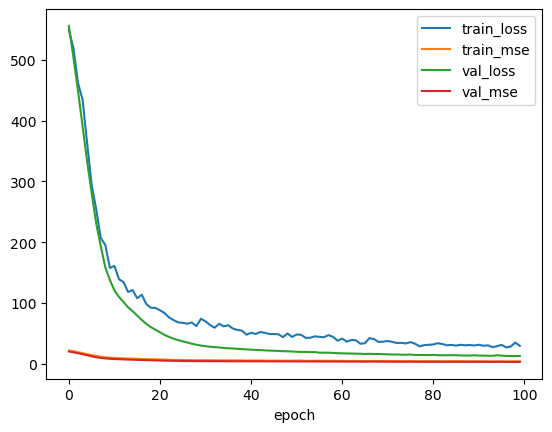

In [20]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["mae"], label = "acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_mae"], label = "val_acc")

plt.legend(("train_loss", "train_mse", "val_loss", "val_mse"))
plt.xlabel("epoch")
plt.show()

In [21]:
model.evaluate(scaled_sub, y_sub), model.evaluate(scaled_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 21.5537 - mae: 3.3373
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 27.4504 - mae: 3.6922 


([21.442384719848633, 3.3900887966156006],
 [31.183956146240234, 3.8636722564697266])

In [22]:
pred = model.predict(scaled_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [23]:
pred[:5]

array([[27.089546 ],
       [21.501017 ],
       [20.373837 ],
       [22.12483  ],
       [ 5.6415896]], dtype=float32)

In [24]:
y_test[:5]

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
Name: PRICE, dtype: float64